# MATLAB on Google Colab

This is the example that will be covered in this notebook:
https://www.mathworks.com/help/deeplearning/ug/time-series-forecasting-using-deep-learning.html

- Start by changing the runtime to a GPU
- Execute the following bash script to get MATLAB:
https://gist.github.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9
- Add more toolboxes as needed to the line `mpm install --products=MATLAB`
https://www.mathworks.com/help/install/ug/mpminstall.html
(you can get the list from this page, replace the spaces by underscores_ https://www.mathworks.com/products.html)


More resources:
- https://blogs.mathworks.com/deep-learning/2023/07/26/matlab-with-tensorflow-from-your-jupyter-notebook/
- https://www.mathworks.com/help/deeplearning/ref/exportnetworktotensorflow.html

In [ ]:
from google.colab import output
output.serve_kernel_port_as_window(3000, path='/')

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

In [ ]:
import forecastTF
model = forecastTF.load_model()

In [42]:
# model.layers
# model.input_shape
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_ (LSTM)                    │ (None, None, 128)      │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_ (Dense)                     │ (None, None, 3)        │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,971 (265.51 KB)

 Trainable params: 67,971 (265.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matlab.engine
m = matlab.engine.connect_matlab('MATLAB_20074')
# m.who()

In [33]:
import numpy as np
X = m.workspace['X']
X = np.array(X)
X = np.expand_dims(X, axis=0)
X.shape

(1, 191, 3)

In [34]:
Y = model.predict(X)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 191, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step


In [35]:
Y.shape

(1, 191, 3)

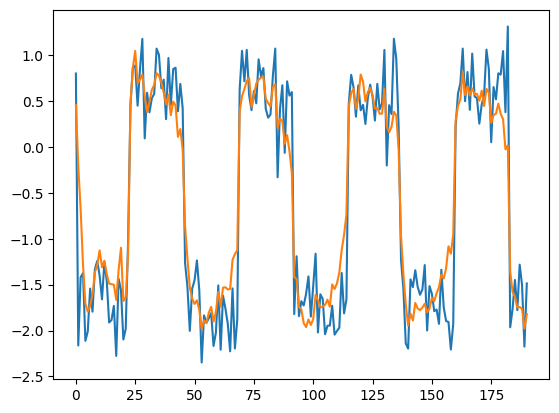

In [40]:
import matplotlib.pyplot as plt
plt.plot(X[0,:,0])
plt.plot(Y[0,:,0])